# **Custos Médicos - Regressão Linear Multipla e Regressão Polinomial**

A ideia neste problema é estimar o custo do seguro no plano de saúde para uma pessoa com base em dados adicionais como idade, si é fumante ou não, se tem dependentes, etc.

Isto quer dizer que temos considerar que nuestra variável dependiente será o **_Custo_** e as caraterísticas restantes serão consideradas como as variáveis independientes, em outras palavras Custo depende (umas vezes mais e outras menos) de todas as outras variáveis

O Primeiro a fazer é estabelecer a influencia de todas essas variáveis (caraterísticas) no valor final dos Custos Médicos, de forma individual.

**_É importante lembrar que temos que ter a capacidade de predecir um valor de custo para uma nova pessoa (cliente) dados as suas proprias caraterísticas_.**

Iniciemos esta análise selecionando os dados que vamos a utilizar.


Vamos importar os dados:

# Importação dos dados:
Os dados podem ser obtido do site do Kaggle.com : https://www.kaggle.com/datasets/mirichoi0218/insurance

Podemos fazer um download e depois abrir ou também importar diretamente usando um link onde esta o arquivo. Esses dados serão guardados na variável **dados** do tipo _dataframe_.

In [596]:
import pandas as pd
url = 'https://raw.githubusercontent.com/profjuanito/Dataset/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Informações dos dados:

Obter informações gerais dos dados como número de variáveis, tipo, etc.     

In [597]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos ver a primeira estatística dos dados usando -> _.describe_:

In [598]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Análise Exploratória de Dados:

Poderiamos fazer uma análise, olheando todas as variáveis uma por uma. Mas, temos no phyton uma ferramenta que permite fazer uma preanálise rápida.

Temos que instalar uma biblioteca -> *sweetviz*


In [599]:
# instalando biblioteca de visualização

!pip install sweetviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [600]:
import sweetviz as sv

Depois de importar a biblioteca, definimos para  a nossa análise rápida a variável resposta ´**Custos**´, e observar se existe correlacão ou muita dependência com as outras variáveis.

In [601]:
eda = sv.analyze(source = dados, target_feat = 'charges')

                                             |          | [  0%]   00:00 -> (? left)

Para fazer uma análise padrão usamos o comando  ->  *show_notebook() *

Presionando no botão de associations podemos a uma matriz de correlação entre todas as variáveis.

Vemos que:
 
* ser fumante (variável categórica) tem uma corelação muito forte com o preço.
* a idade e o índice de massa corporal tembém têm uma forte correlação.

Mas todas as nossa variáveis têm uma correlação positiva.


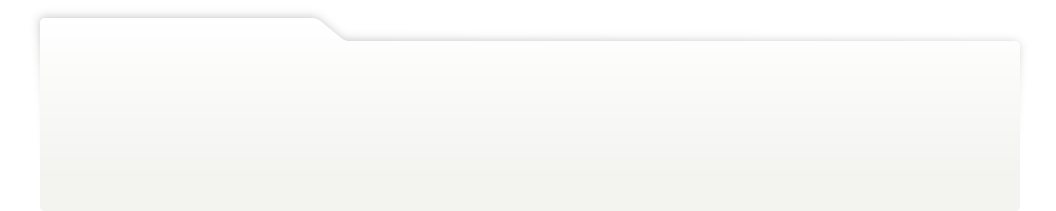
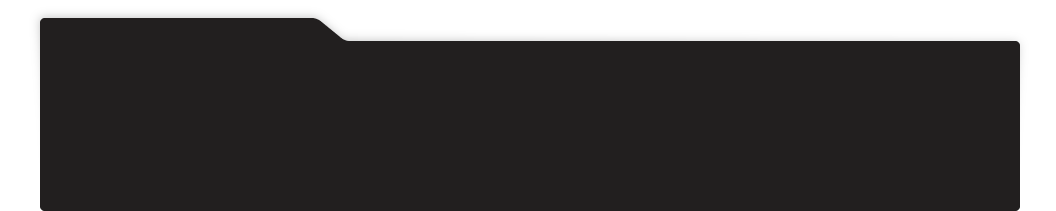
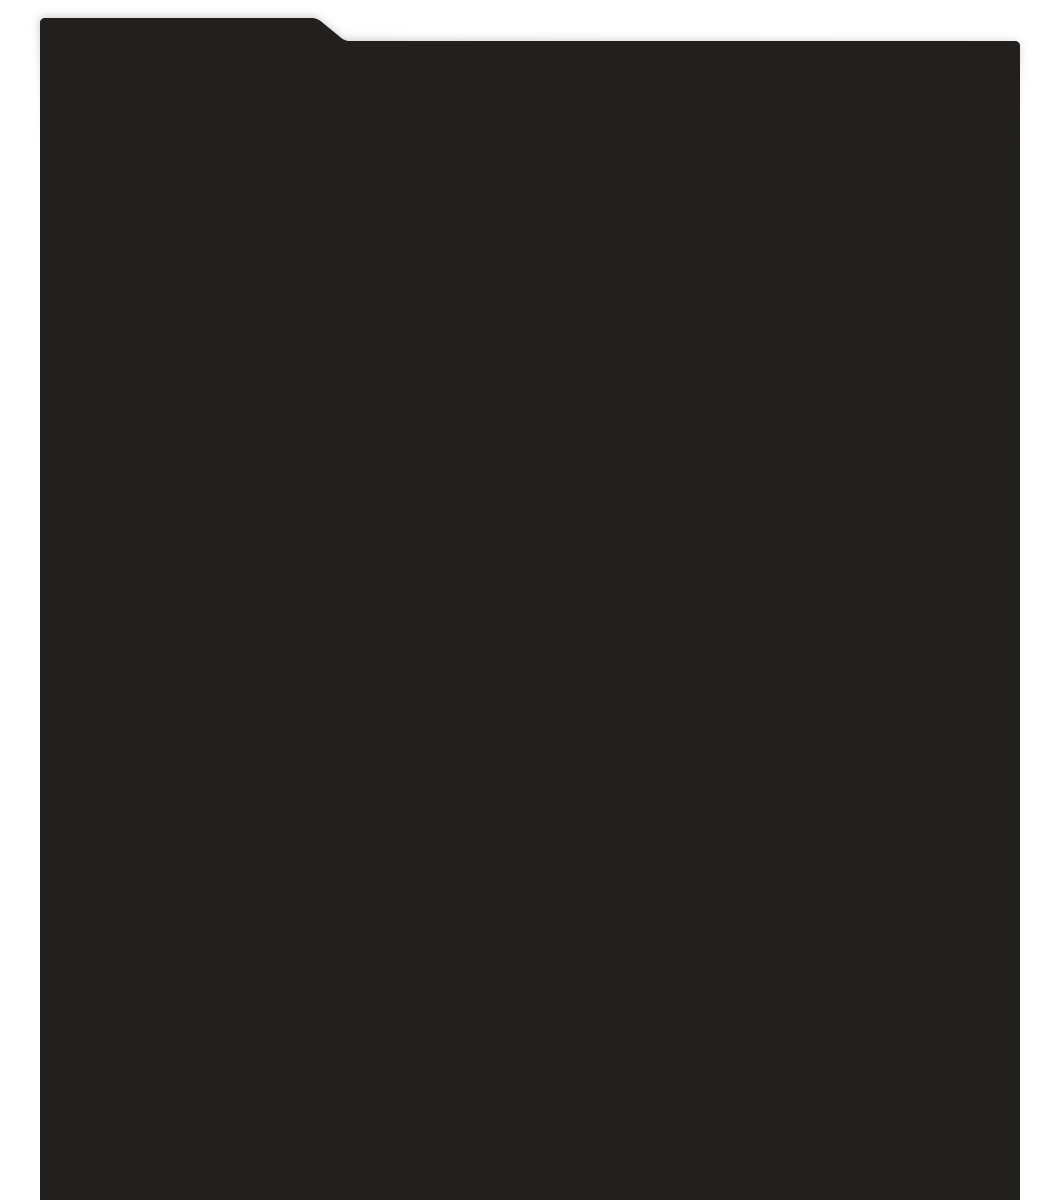
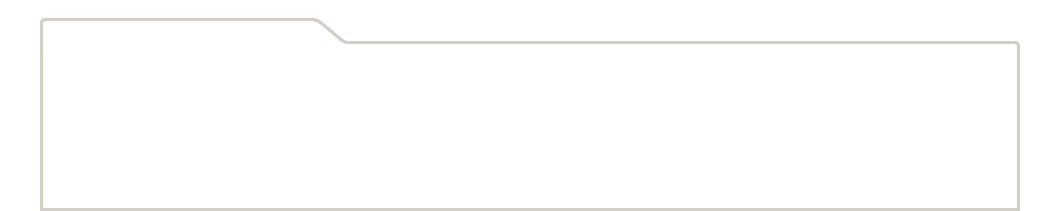
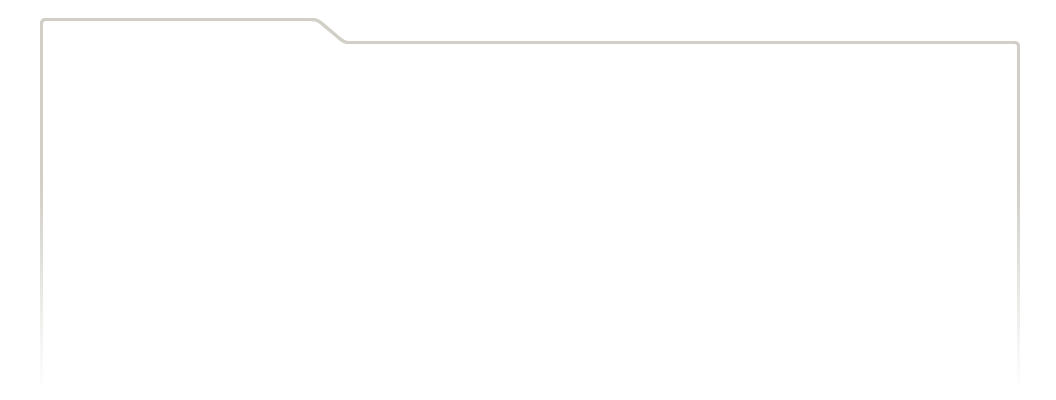
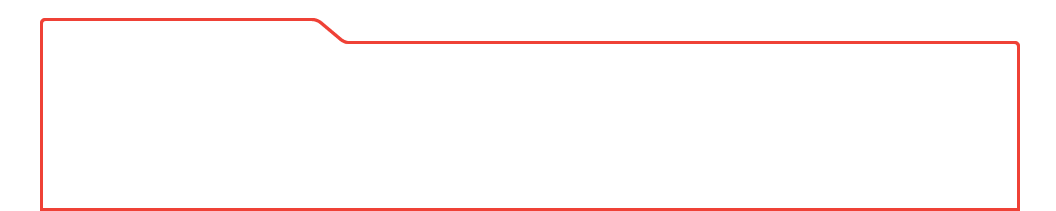
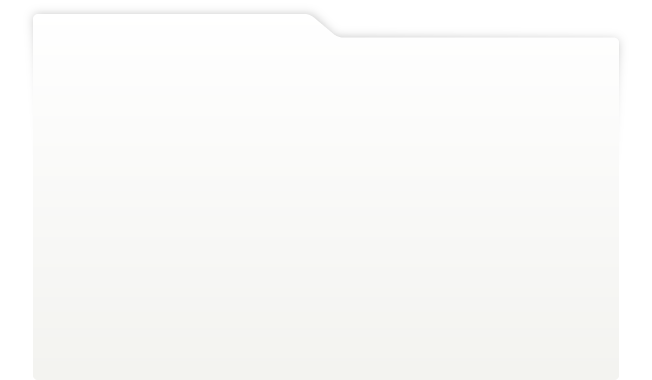
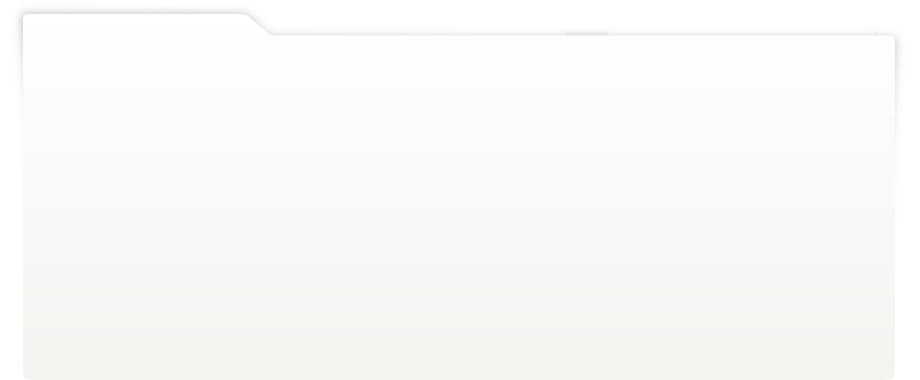
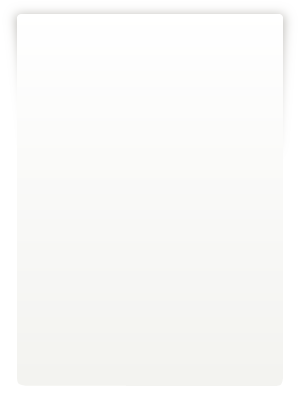
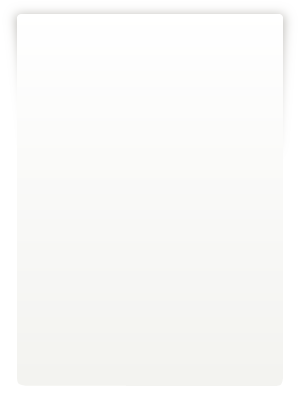
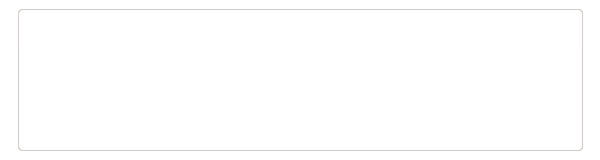
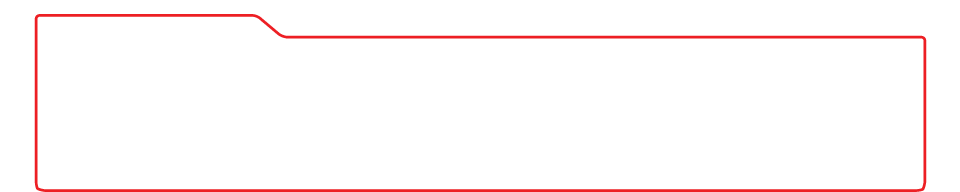
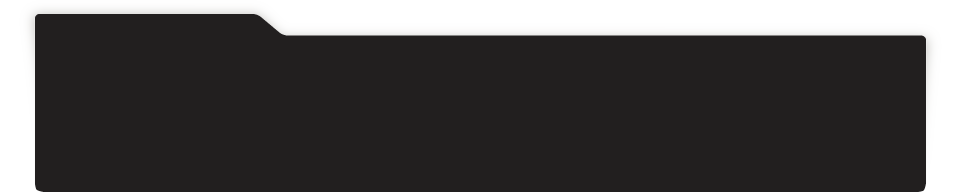
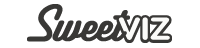
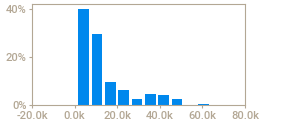
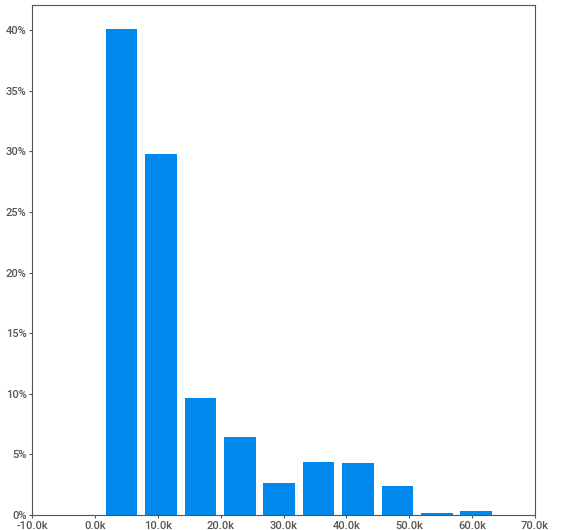
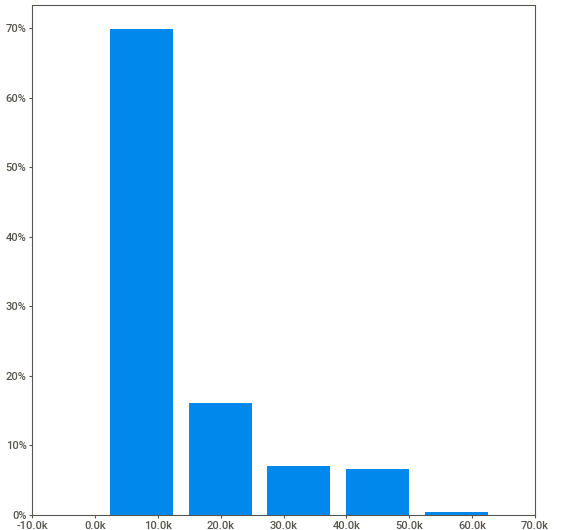
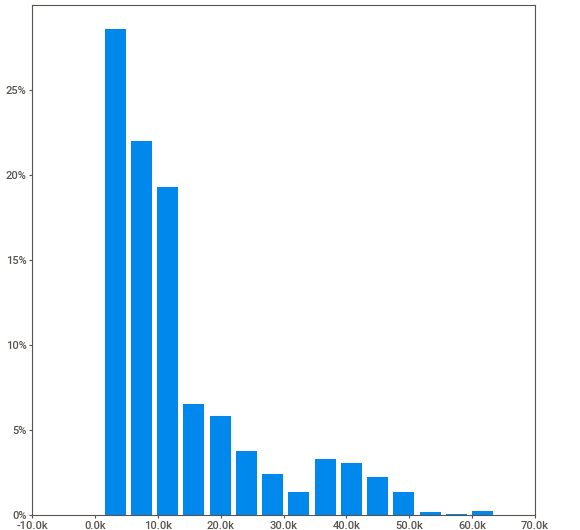
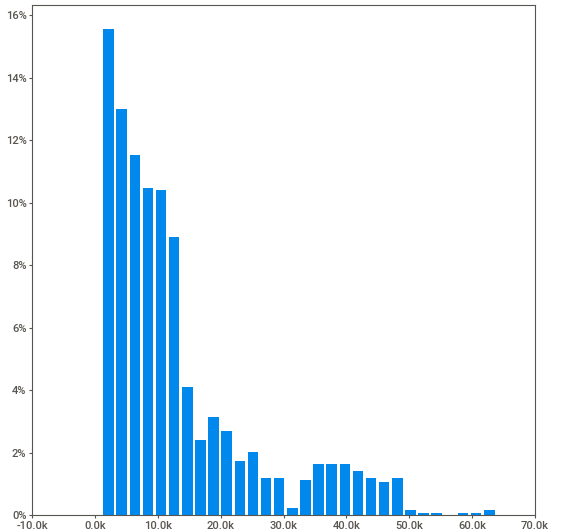
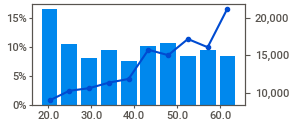
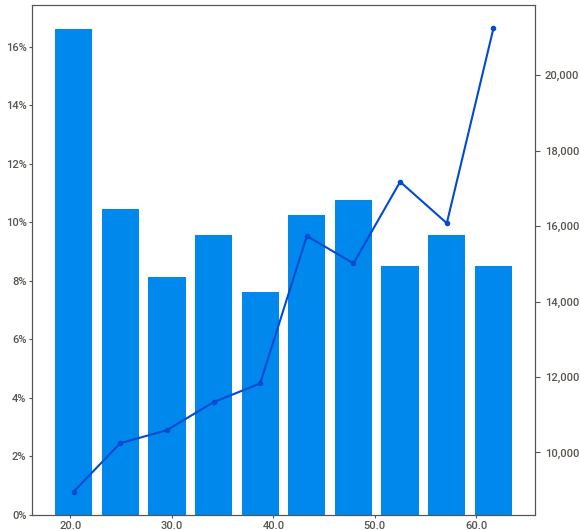
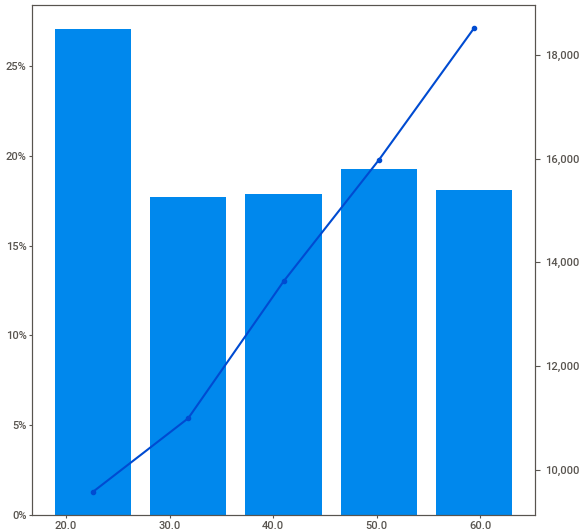
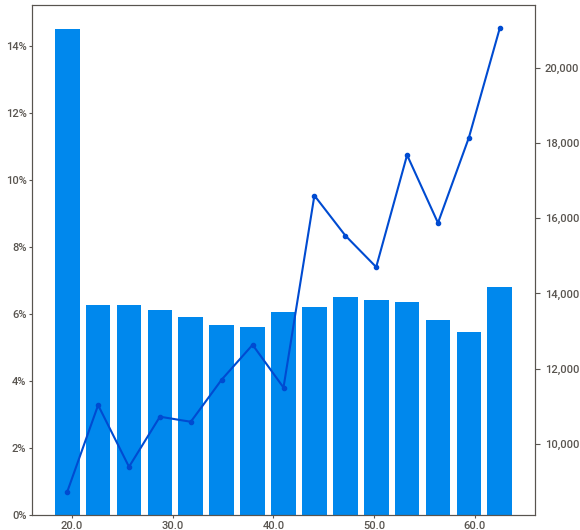
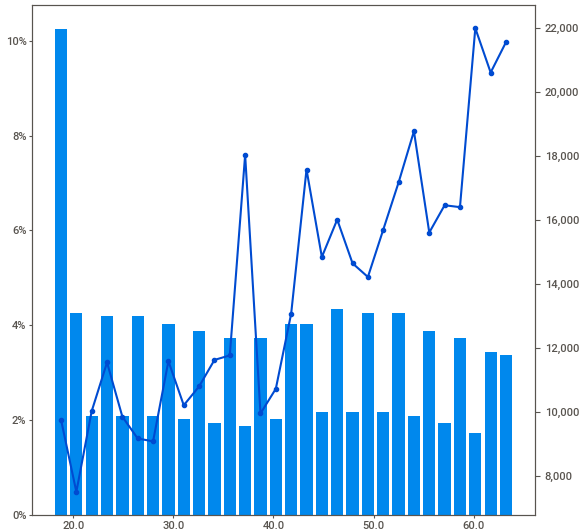
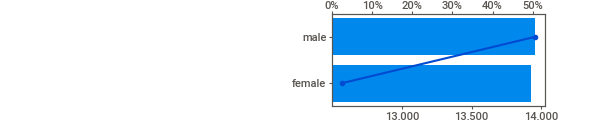
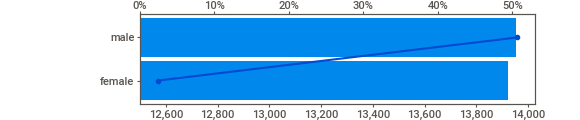
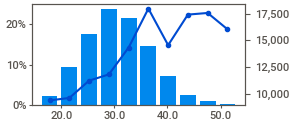
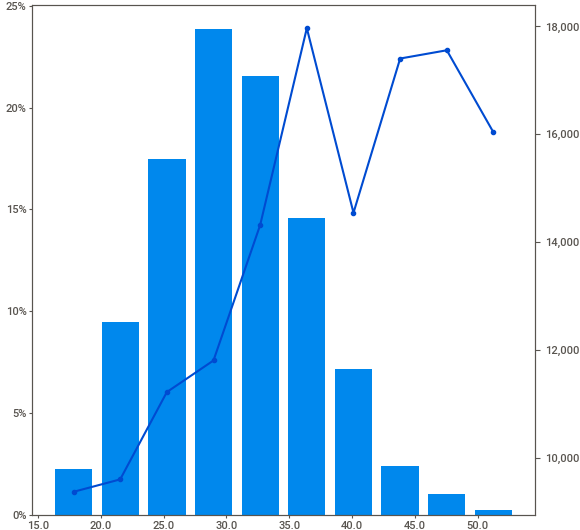
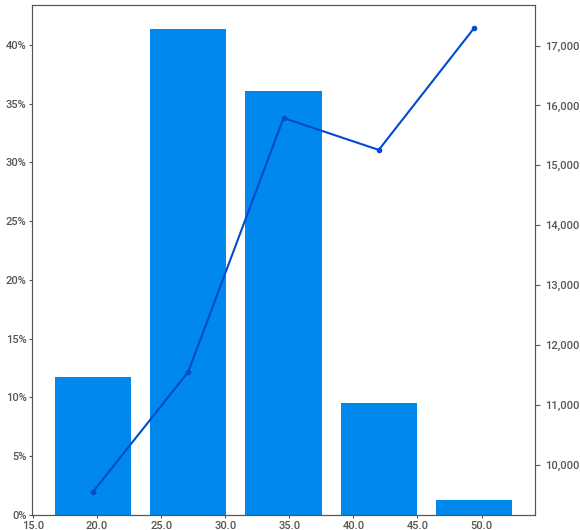
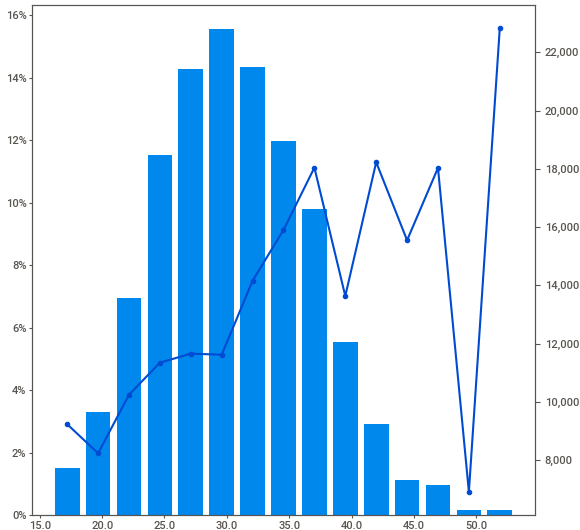
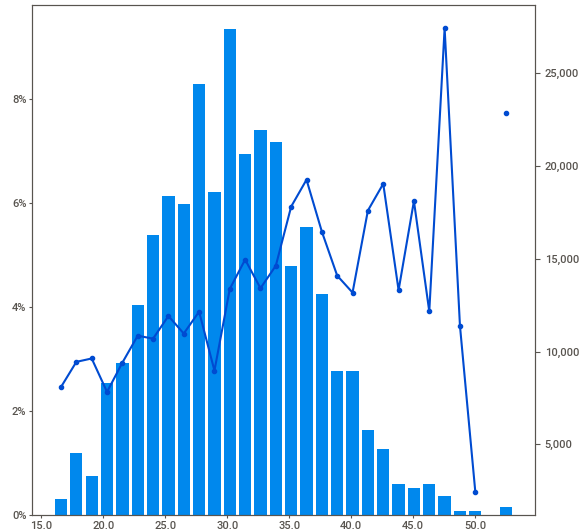
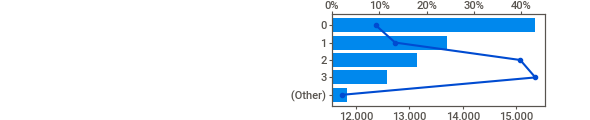
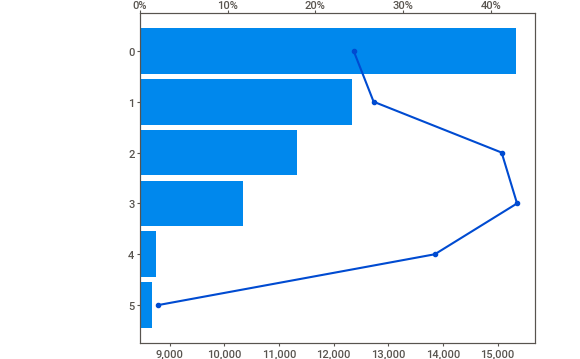
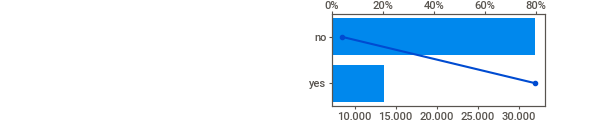
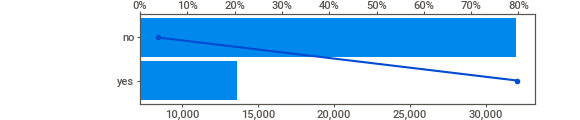
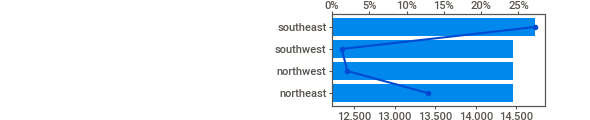
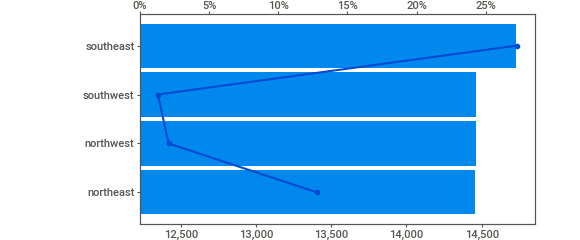
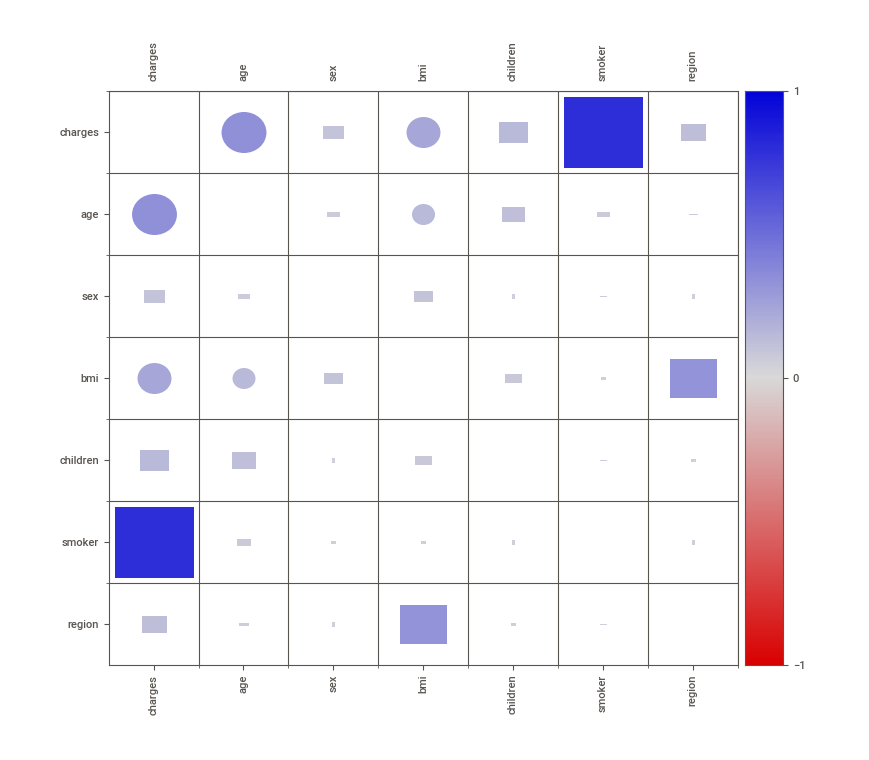
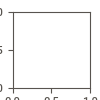

In [602]:
eda.show_notebook()

In [603]:
eda2 = sv.compare_intra(source_df = dados,
                              condition_series = dados['smoker'] == 'yes',
                              names = ['Fumante', 'Não-Fumante'],
                              target_feat = 'charges')

                                             |          | [  0%]   00:00 -> (? left)


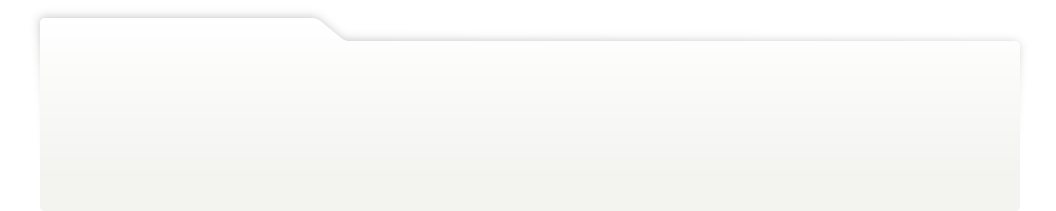
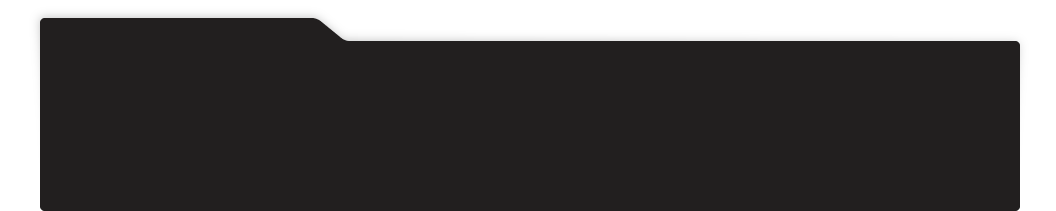
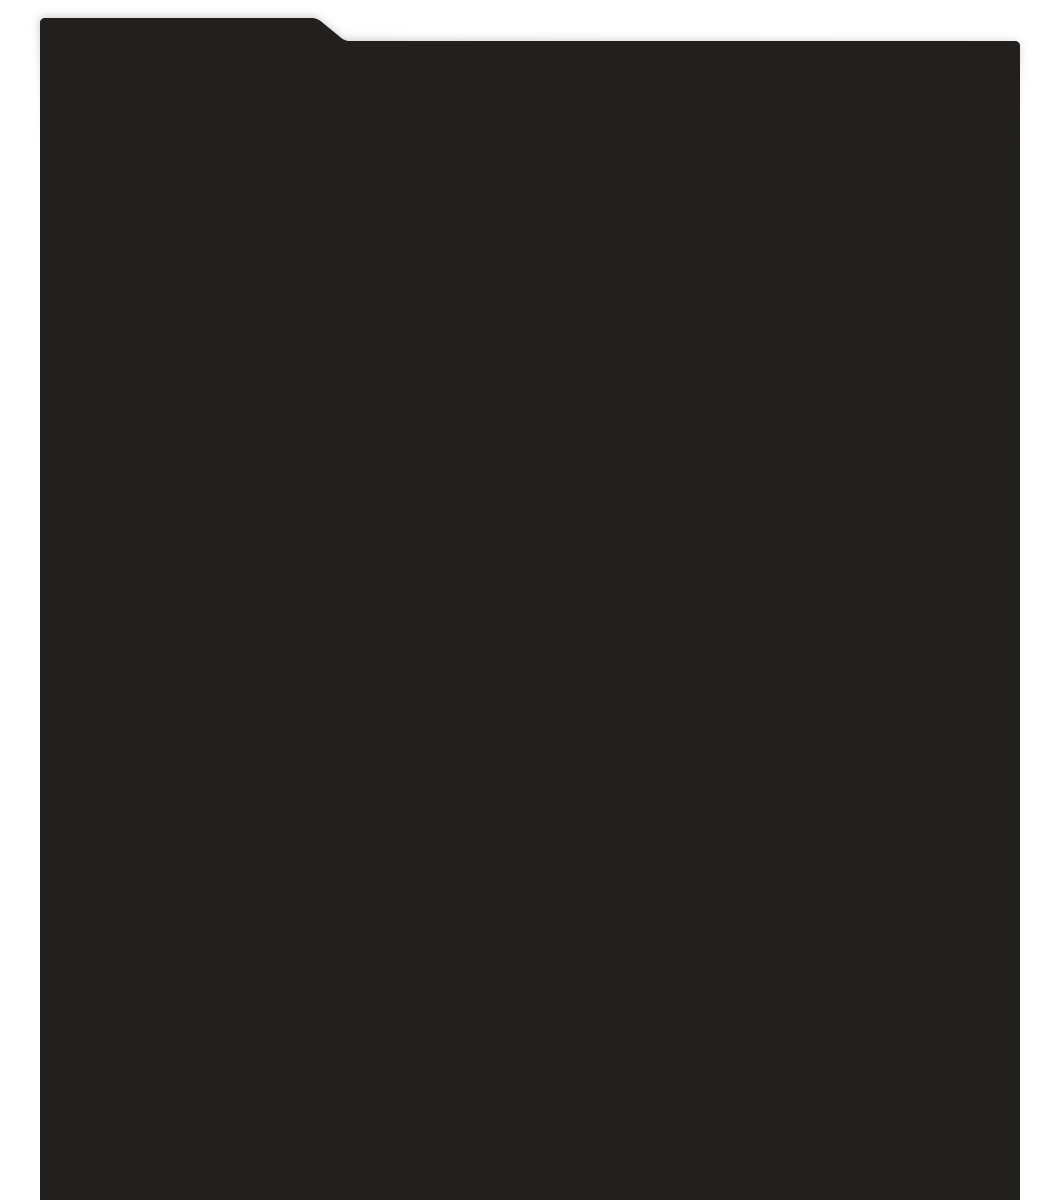
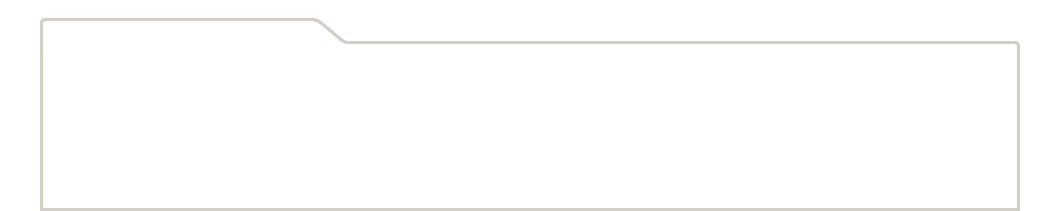
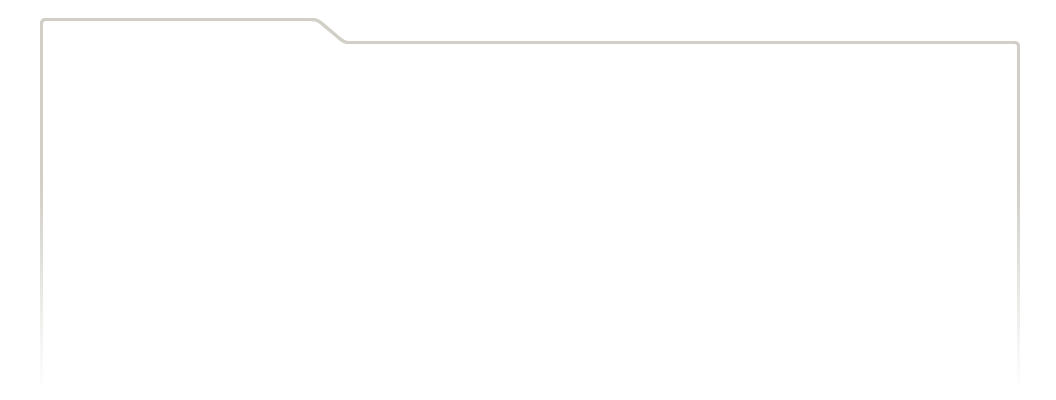
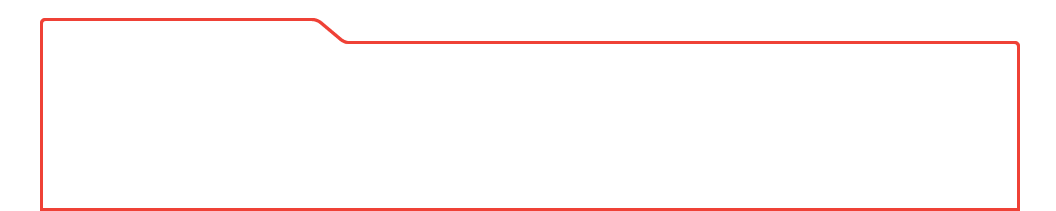
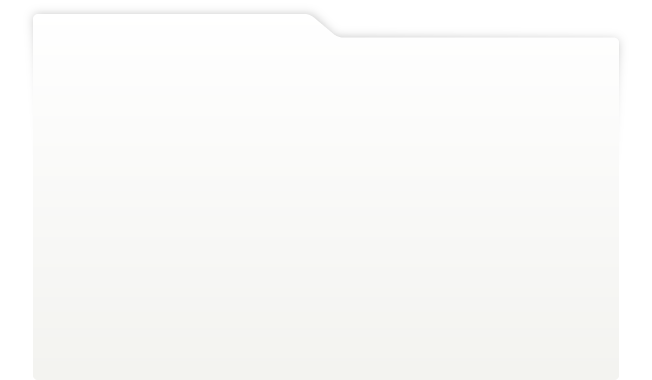
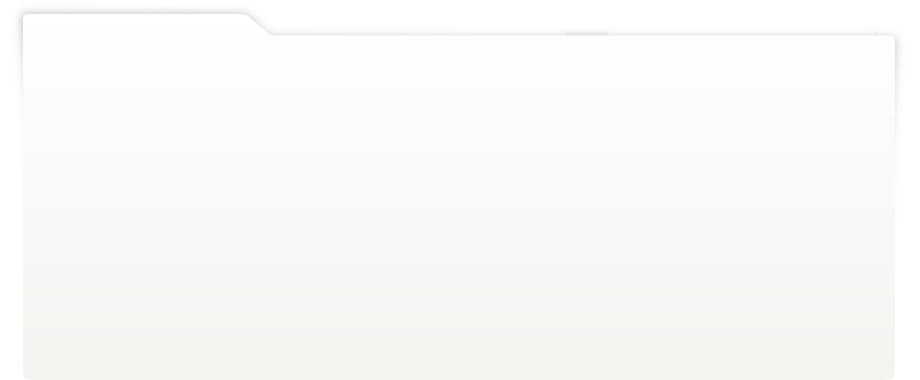
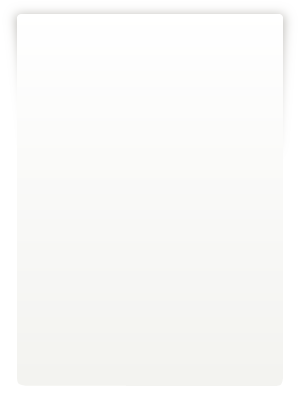
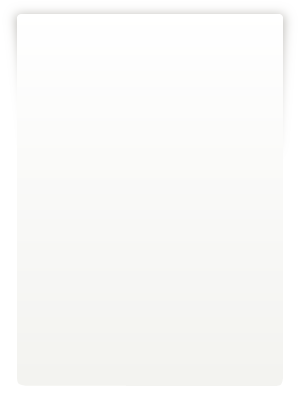
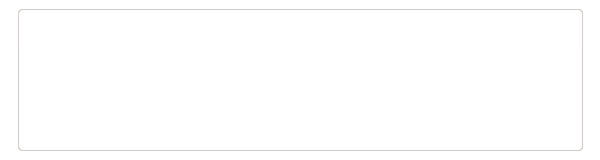
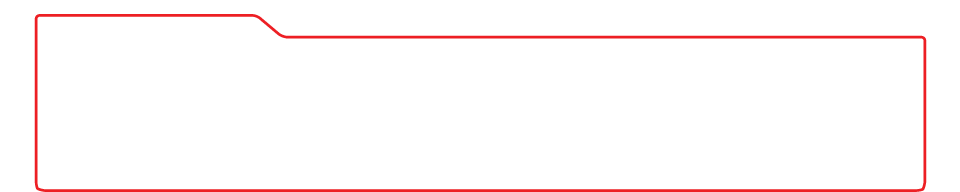
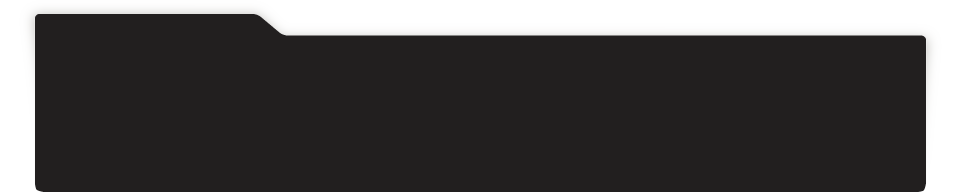
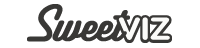
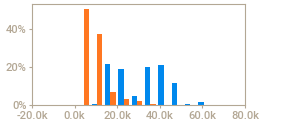
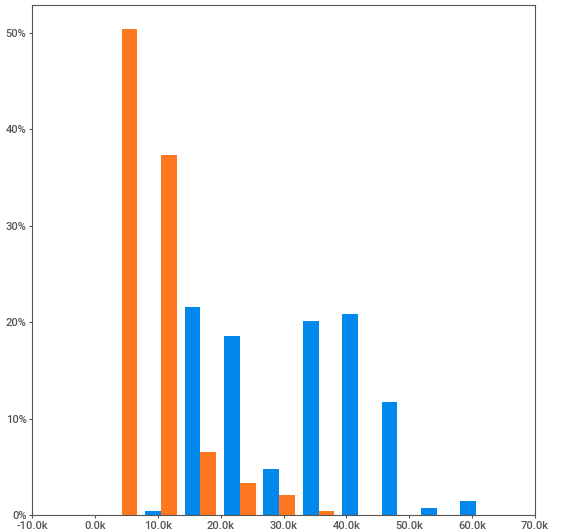
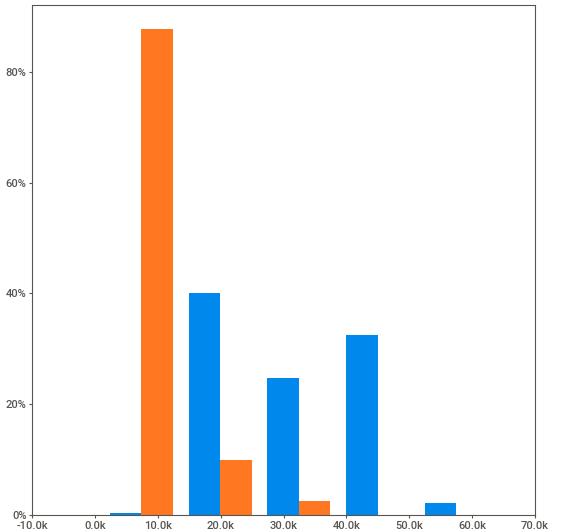
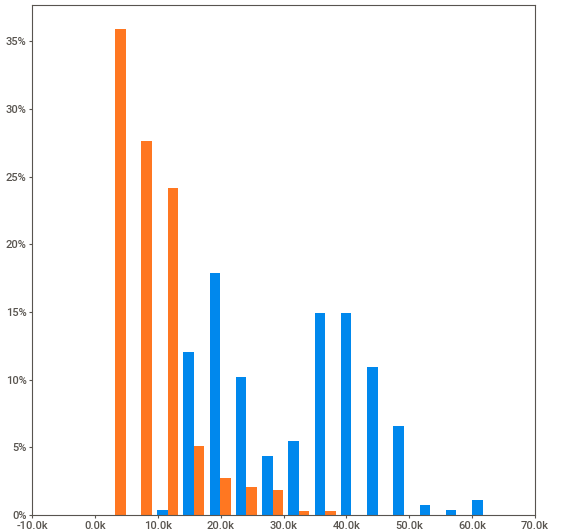
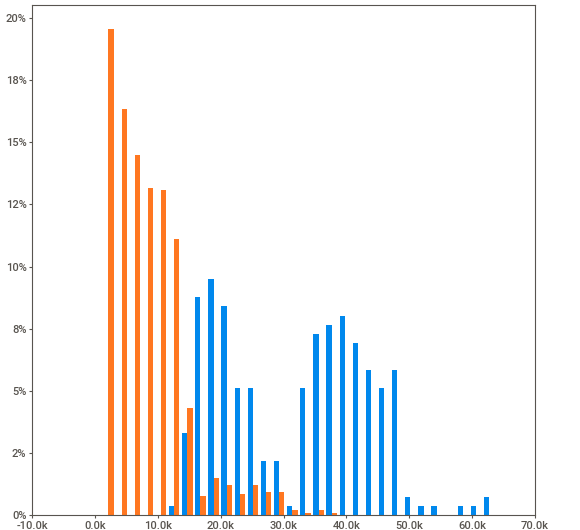
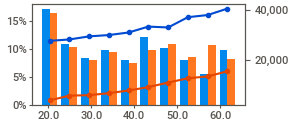
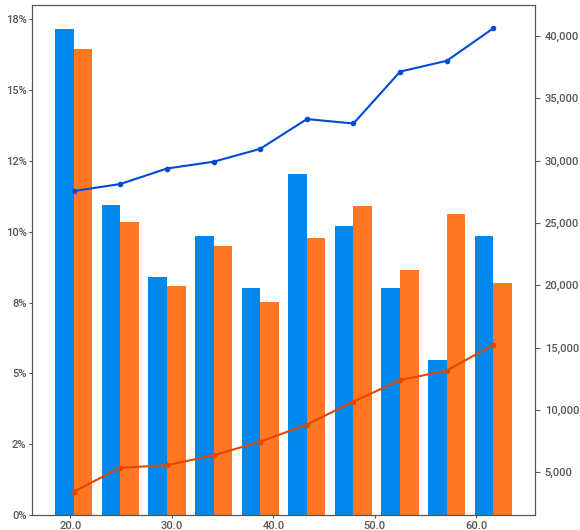
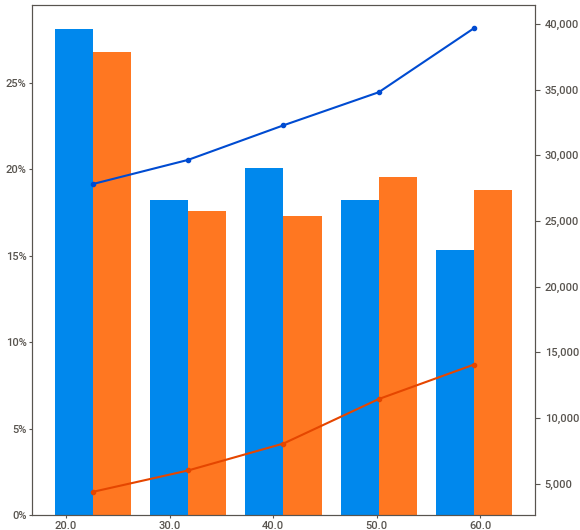
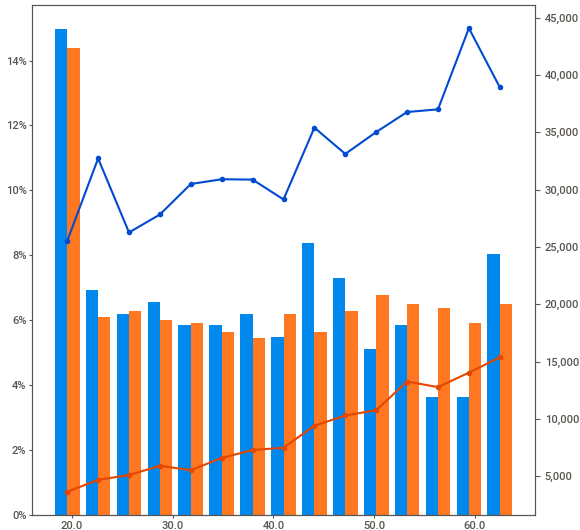
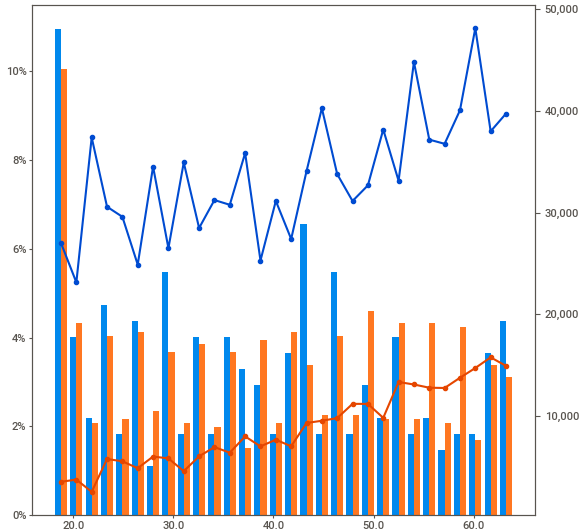
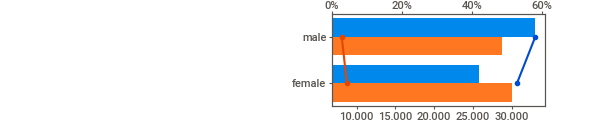
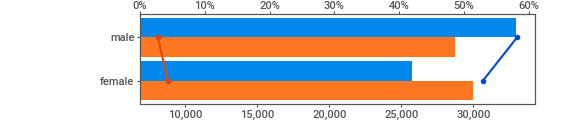
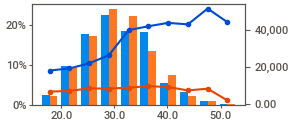
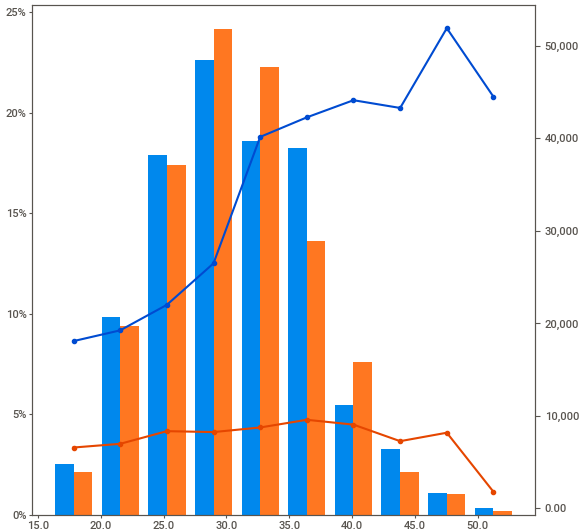
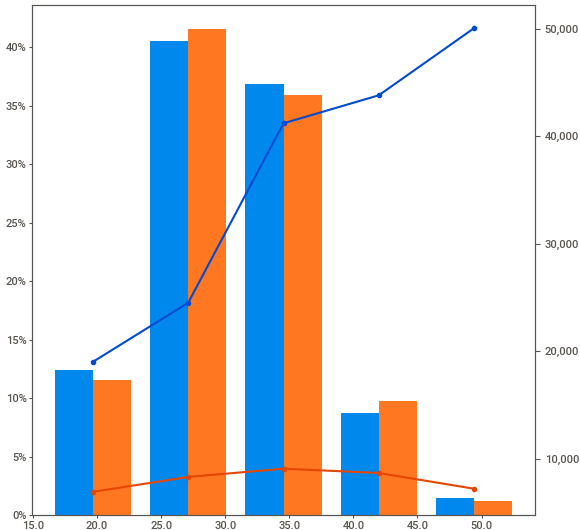
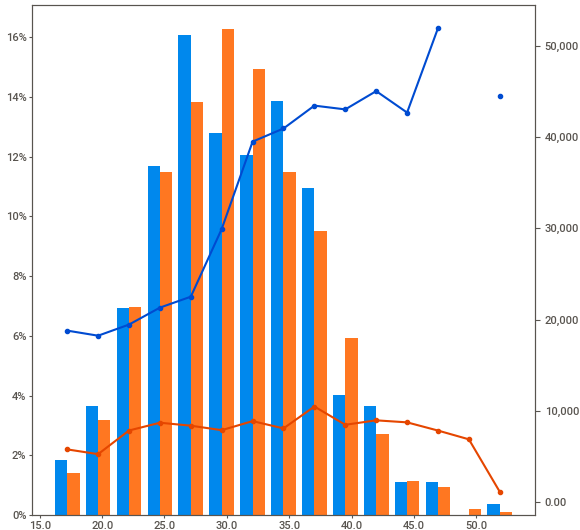
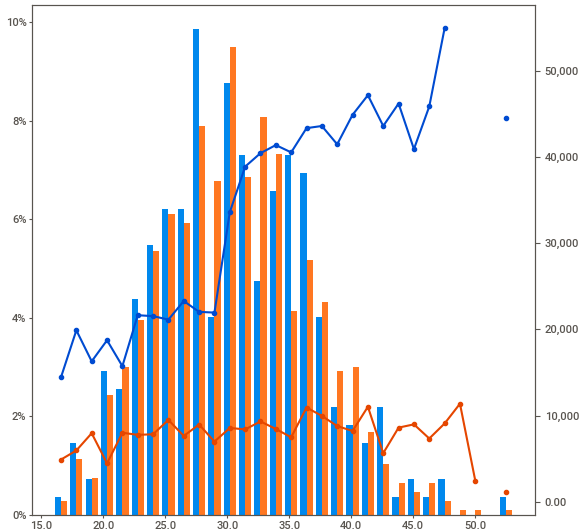
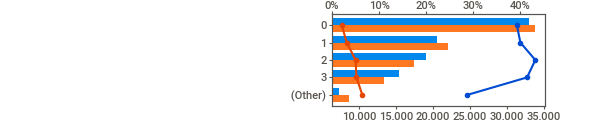
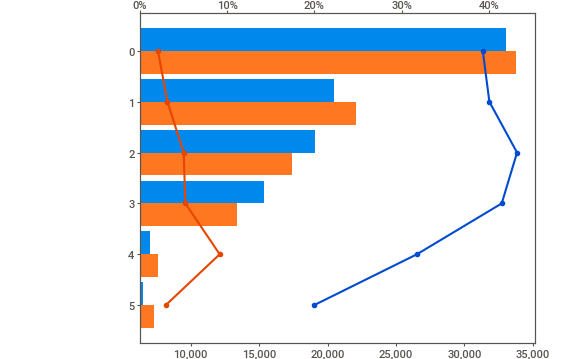
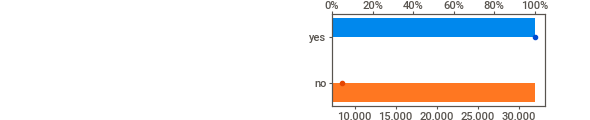
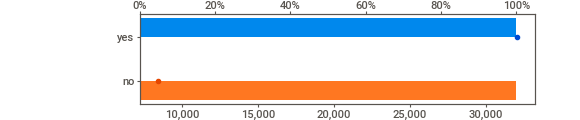
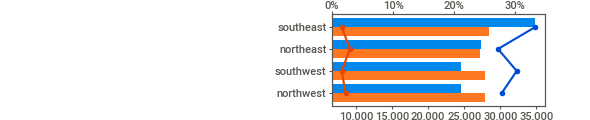
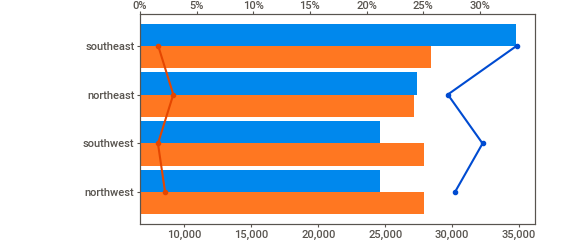
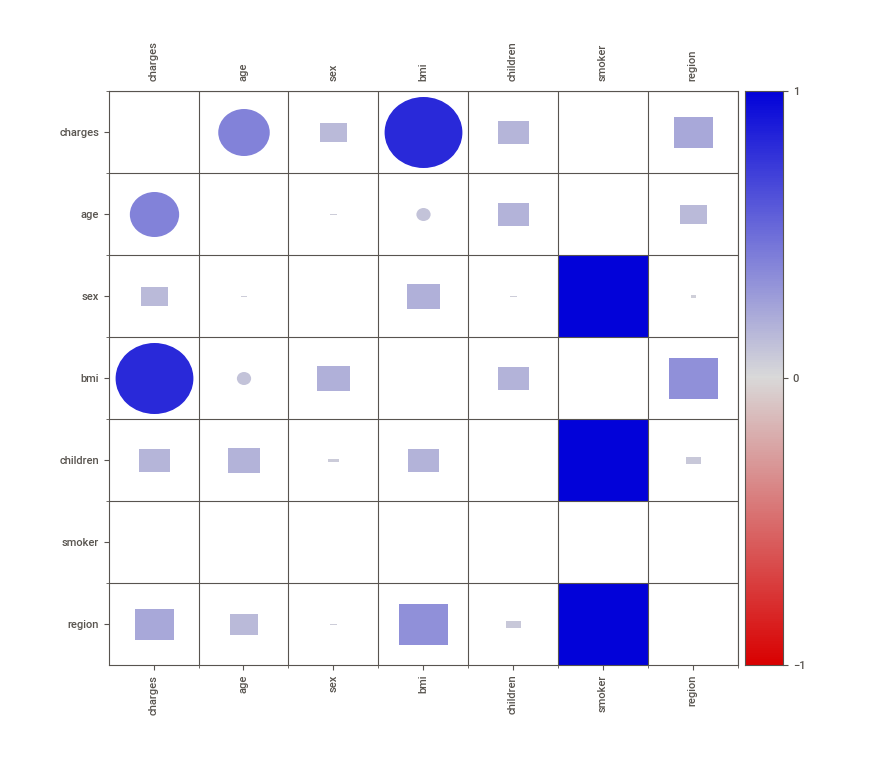
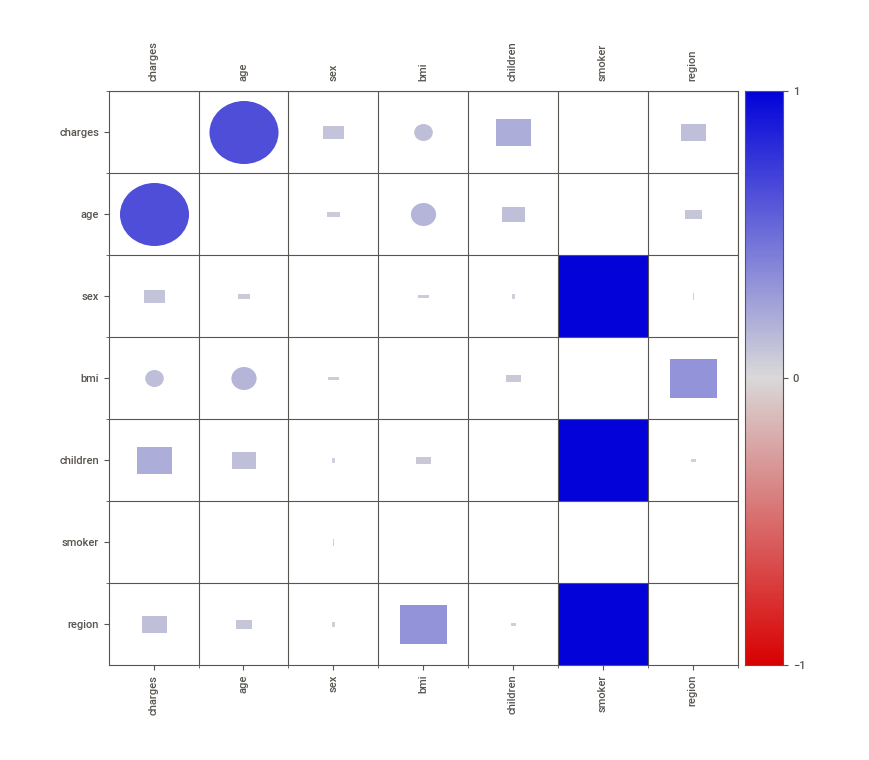

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [604]:
eda2.show_notebook()
eda2.show_html(layout = 'vertical')

# Mise en place para Modelagem

Em Machine Learning, em geral, todas as variáveis do conjunto de dados que será utilizado precisam ser númericas. É também interessante que o intervalo de variabilidade das variáveis contínuas não seja tão grande e esteja próximo de zero.

Para tanto, façamos as seguintes transformações:

* Transformar a variável **Fumante** em 0 (não) ou 1 (sim)
* Colocar a variável resposta na escala para cada mil dolares.

Nesta primeira análise vamos considerar só as variáveis:
* var. dependiente: **Custos**
* var. independientes: índice de massa corporal (**IMC**) e ser fumante ou não.
* var. independiente: **sexo** (Homem = 1 ou Mulher = 0.)
* var. independiente: **Idade** variavel contínua.

In [605]:
dados[('age')].describe()
#dados[('age')].mean()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [606]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados['sex'] = dados['sex'].map({'male': 1, 'female': 0})
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16.884924
1,18,1,33.770,1,0,southeast,1.725552
2,28,1,33.000,3,0,southeast,4.449462
3,33,1,22.705,0,0,northwest,21.984471
4,32,1,28.880,0,0,northwest,3.866855


In [607]:
# distribuição de quantidade de filhos
dados['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Da pre-análise temos que o número de filhos também afeta diretamente no valor do custos, para valor de filhos>1 o custo é maior, por tanto seria bom reagrupar.

Vamos considear uma nova caraterística filhos>1 para todos os valores de filhos = 2, 3, 4, e 5

In [608]:
def aux(x):
    if x == 0 or x == 1:
        return 0
    else:   
        return 1  

dados['children>1'] = dados['children'].apply(aux)
dados.head()

,age,sex,bmi,children,smoker,region,charges,children>1
0,19,0,27.900,0,1,southwest,16.884924,0
1,18,1,33.770,1,0,southeast,1.725552,0
2,28,1,33.000,3,0,southeast,4.449462,1
3,33,1,22.705,0,0,northwest,21.984471,0
4,32,1,28.880,0,0,northwest,3.866855,0


In [609]:
dados['children>1'].value_counts()

0    898
1    440
Name: children>1, dtype: int64

Com a mesma idea temos que na 

In [610]:
def aux(x):
    if x == 'southwest' or x == 'northwest':
        return 0
    else:   
        return 1  

dados['Region_East'] = dados['region'].apply(aux)
#dados.head()

,age,sex,bmi,children,smoker,region,charges,children>1,Region_East
0,19,0,27.900,0,1,southwest,16.884924,0,0
1,18,1,33.770,1,0,southeast,1.725552,0,1
2,28,1,33.000,3,0,southeast,4.449462,1,1
3,33,1,22.705,0,0,northwest,21.984471,0,0
4,32,1,28.880,0,0,northwest,3.866855,0,0


In [611]:
dados = dados[['sex', 'age', 'bmi', 'children>1', 'Region_East', 'smoker','charges']]
dados.head()

,sex,age,bmi,children>1,Region_East,smoker,charges
0,0,19,27.900,0,0,1,16.884924
1,1,18,33.770,0,1,0,1.725552
2,1,28,33.000,1,1,0,4.449462
3,1,33,22.705,0,0,0,21.984471
4,1,32,28.880,0,0,0,3.866855


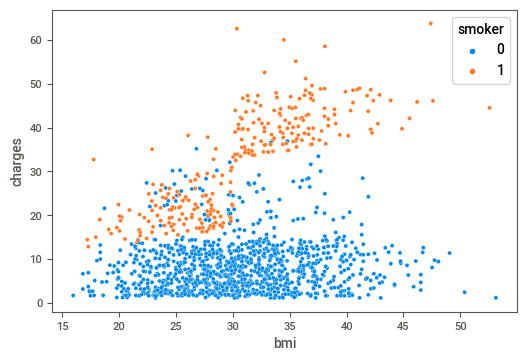

In [612]:
import numpy as np
import seaborn as sns

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

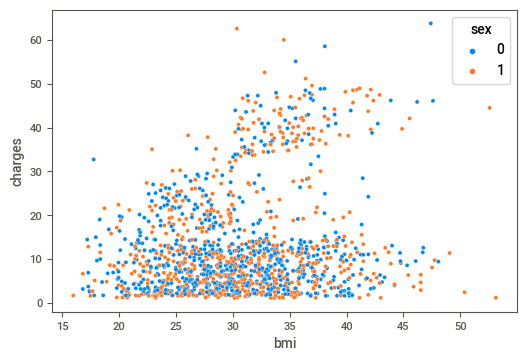

In [613]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'sex', data = dados);

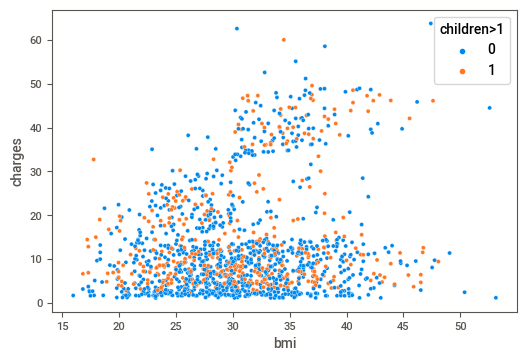

In [614]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'children>1', data = dados);

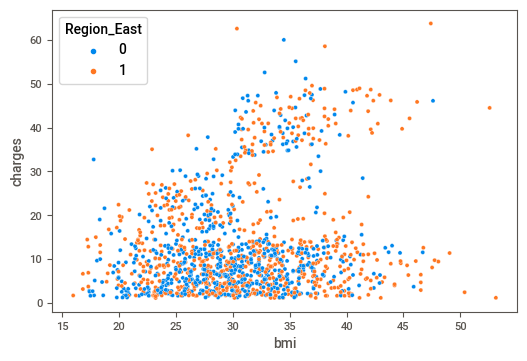

In [615]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'Region_East', data = dados);

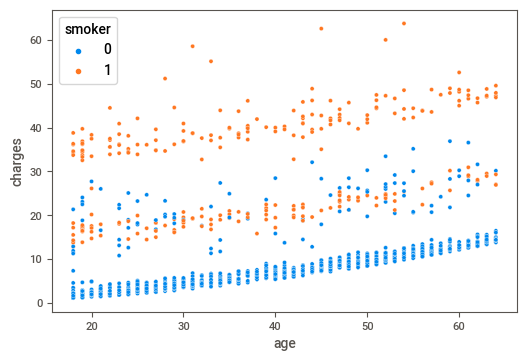

In [616]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = dados);

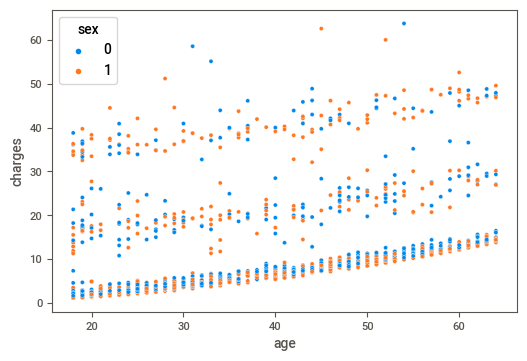

In [617]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'sex', data = dados);

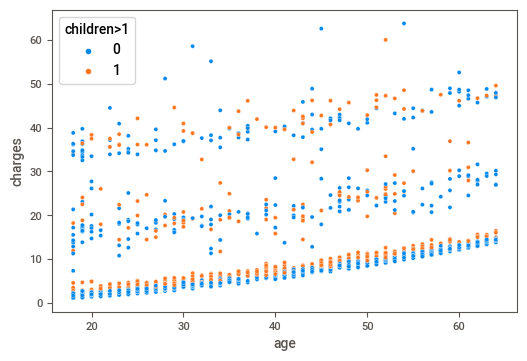

In [618]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'children>1', data = dados);

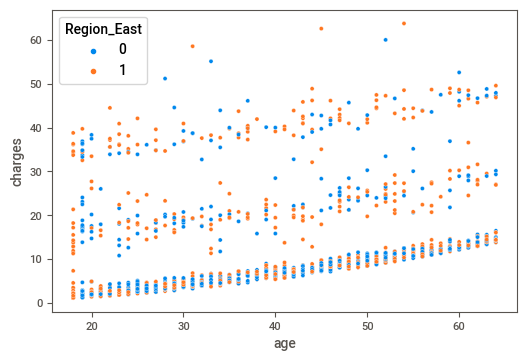

In [619]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'Region_East', data = dados);

**Correlação entre variáveis**



In [620]:
dados.corr()

,sex,age,bmi,children>1,Region_East,smoker,charges
sex,1.000000,-0.020856,0.046371,0.008585,0.013162,0.076185,0.057292
age,-0.020856,1.000000,0.109272,0.040541,-0.008245,-0.025019,0.299008
bmi,0.046371,0.109272,1.000000,0.020346,0.122011,0.003750,0.198341
children>1,0.008585,0.040541,0.020346,1.000000,-0.045352,0.031126,0.091187
Region_East,0.013162,-0.008245,0.122011,-0.045352,1.000000,0.063400,0.071314
smoker,0.076185,-0.025019,0.003750,0.031126,0.063400,1.000000,0.787251
charges,0.057292,0.299008,0.198341,0.091187,0.071314,0.787251,1.000000


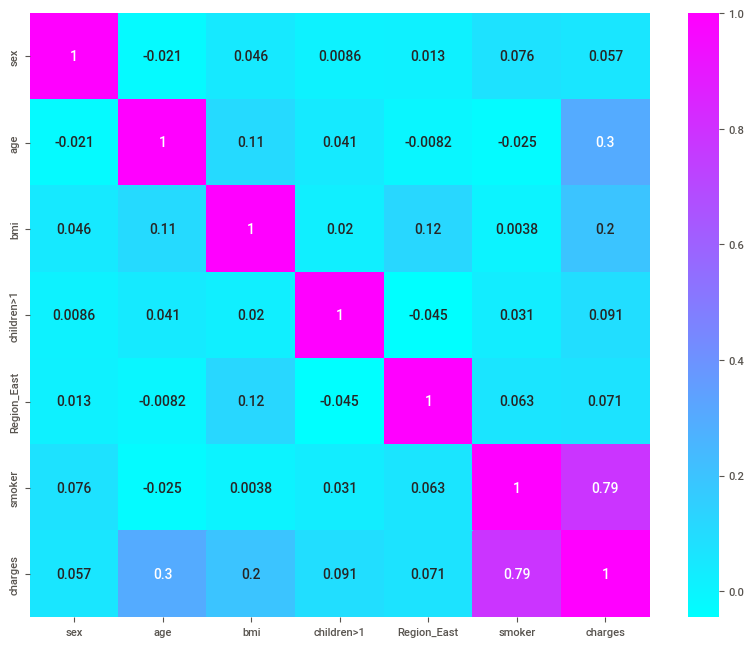

In [621]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.heatmap(dados.corr(), annot=True, cmap='cool')

**Gráficos**

Quando temos muitas variaveis os gráficos perdem muito o sentido pois a interpretação  e muito complicada e não sera discutido aqui. 

# **Modelo de Regressão Linear Multipla**


$$Custos = b_0 + b_1 \cdot Idade + b_2 \cdot IMC + b_3 \cdot Fumante $$


Primeiro temos que importar uma biblioteca -> *sklearn.linear_model* 

In [622]:
#X = dados[['age', 'bmi', 'children>1','Region_East','smoker']]
#X = dados[['age', 'bmi', 'children>1','smoker']]
X = dados[['age', 'bmi','smoker']]
y = dados['charges'] 

Para poder avaliar o nosso modelo temos que analisar (estudar) o valor dos erros. Isto é nosso ajuste será melhor quando nosso erro for menor.

Vamos analisar o valor do erro quadrático médio que não é nada mais do que o quadrado da diferença entre o valor real e o valor estimado. 

Este valor pode ser calculado diretamente usando os valores obtidos usando a equação:

$$ eqm = (y - (b_0 + b_1 \cdot Idade + b_2 \cdot IMC + b_3 \cdot Fumante))^2$$

In [623]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)
preditos = regressor.predict(X)
eqm = ((y - preditos)**2).mean() 
eqm

37.0053957505075

In [624]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y, preditos))

Mean Squared Error: 37.0053957505075


Também podemos usar o comando -> *mean_squared_error* 

In [625]:
from sklearn.metrics import mean_squared_error 
preditos = regressor.predict(X)
eqm = mean_squared_error(y, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 37.01


In [626]:
# Resgatando os coeficientes ajustados
regressor.intercept_

-11.676830425187765

In [627]:
regressor.coef_

array([ 0.25954749,  0.32261513, 23.8236845 ])

In [628]:
regressor.score(X,y)

0.7474771588119513

$$Custos = -11.677 + 0.260 \cdot Idade + 0.323 \cdot IMC + 23.823 \cdot Fumante $$


___
___

## Técnica de Validação: _Holdout Repetido_

Por ser aleatoria a seleção dos conjuntos, é melhor fazer varias vezes este procedimento para poder obter uma estatística e calcular o valor mais estável para o EQM.

In [629]:
import sklearn.linear_model as lm

R = 1000
eqms = [] 

#X = dados[['age', 'bmi', 'children>1','Region_East','smoker']]
#X = dados[['age', 'bmi', 'children>1','smoker']]
X = dados[['age', 'bmi','smoker']]
y = dados['charges'] 

# Técnica HOLDOUT
from sklearn.model_selection import train_test_split 

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    regressor = lm.LinearRegression()
    regressor.fit(Xtreino, ytreino)
    preditos = regressor.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos) 
    eqms.append(eqm) 
    
print(np.mean(eqms)) 

37.15107756496963


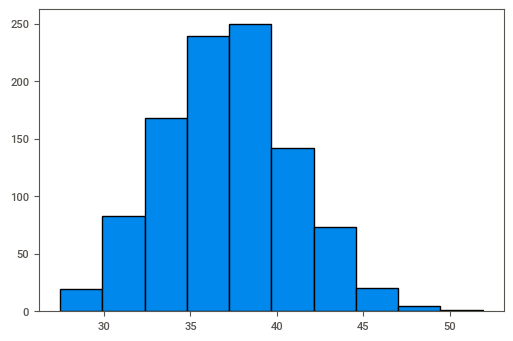

In [630]:
import matplotlib.pyplot as plt

plt.hist(eqms, edgecolor = 'black')
plt.show()

In [631]:
from scipy.stats import norm

In [632]:
def gaussiana(x, H, amp, x0, sigma):
  return H + amp*np.exp(-(x-x0)**2.0/(2.0*sigma**2.0))

# **Modelo de Regressão Polinomial**

Podemos testar uma regressão polinomial com funções quadráticas (grau = 2)

In [653]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures (degree = 2)
X_pol = pol.fit_transform(X)
Xtreino, Xteste, ytreino, yteste  = train_test_split(X_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(Xtreino, ytreino)
ytreino_pred = Pol_reg.predict(Xtreino)
yteste_pred = Pol_reg.predict(Xteste)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(Xteste, yteste))

-6.220197801423236
[ 0.00000000e+00  7.03334822e-02  4.98130645e-01 -9.73998136e+00
  1.53678215e-03  2.40254198e-03  2.60895141e-03 -9.19302545e-03
  1.41047824e+00 -9.73998136e+00]
0.8773278585856426


In [637]:
##Evaluating the performance of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yteste, yteste_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yteste, yteste_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yteste, yteste_pred)))

Mean Absolute Error: 2.7925625203527176
Mean Squared Error: 19.520813241241175
Root Mean Squared Error: 4.418236440169445


In [655]:
R = 1000
eqms = [] 

X = dados[['sex','age', 'bmi', 'children>1','Region_East','smoker']]
#X = dados[['age', 'bmi', 'children>1','Region_East','smoker']]
#X = dados[['age', 'bmi', 'children>1','smoker']]
#X = dados[['age', 'bmi','smoker']]
y = dados['charges'] 

from sklearn.model_selection import train_test_split 

for i in range(R):
    pol = PolynomialFeatures (degree = 2)
    X_pol = pol.fit_transform(X)
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X_pol, y, test_size=0.2, random_state=0)
    Pol_reg = LinearRegression()
    Pol_reg.fit(Xtreino, ytreino)
    yteste_pred = Pol_reg.predict(Xteste)
    eqm = mean_squared_error(yteste, yteste_pred) 
    eqms.append(eqm) 
    
print(np.mean(eqms)) 

18.654107020081714


Com o modelo detrminado  vamos comparar o valor real e o valor predito por nosso modelo

In [656]:
##Predicting the charges
#ytreino_pred = Pol_reg.predict(Xtreino)
yteste_pred = Pol_reg.predict(Xteste)
##Comparing the actual output values with the predicted values
dados = pd.DataFrame({'Actual': yteste, 'Predicted': yteste_pred})
dados

,Actual,Predicted
578,9.724530,11.375076
610,8.547691,10.214096
569,45.702022,48.859167
1034,12.950071,14.862597
198,9.644253,8.644621
...,...,...
1084,15.019760,16.435401
726,6.664686,7.823078
1132,20.709020,12.928087
725,40.932429,42.479280


In [657]:
import pandas as pd
#modelo = load_model('meu-melhor-modelo-para-charges')

def valoresoriginais(sex, children, smoker, region):
    valores = []
    if (sex=='male'):
      sex = 1
    else:
      if (sex=='female'):
          sex = 0
      else: 
          print('verifique os valores')   
    valores.append(sex) 
    if (children >= 2): 
        children = 1
    else:
        children = 0
    valores.append(children)    
    if (smoker == 'yes'):       
        smoker = 1
    else:
        smoker = 0
    valores.append(smoker)  
    if (region == 'southwest' or region == 'northwest'):
        region = 0
    else:
        region = 1   
    valores.append(region)       
    return valores        

def CustoSeguro(age, sex, bmi, children, smoker, region):
    valores=valoresoriginais(sex, children, smoker, region)
    dados0 = {'sex': valores[0],'age': [age], 'bmi': [bmi], 'children>1': valores[1], 'Region_East': valores[3],'smoker': valores[2]}
    dados = pd.DataFrame(dados0)
    print(dados)
    print(pol.fit_transform(dados))
    print('***************************************')
    #pol = PolynomialFeatures (degree = 2)
    pred = Pol_reg.predict(pol.fit_transform(dados))
    print('Custo do Seguro: ${}'.format(pred)) 

In [658]:
CustoSeguro(age = 31, 
            sex = 'male', 
            bmi = 25, 
            children = 0, 
            smoker = 'yes', 
            region = 'southwest')

   sex  age  bmi  children>1  Region_East  smoker
0    1   31   25           0            0       1
[[  1.   1.  31.  25.   0.   0.   1.   1.  31.  25.   0.   0.   1. 961.
  775.   0.   0.  31. 625.   0.   0.  25.   0.   0.   0.   0.   0.   1.]]
***************************************
Custo do Seguro: $[20.82800388]


In [662]:
CustoSeguro(60, 'female', 30, 2, 'yes', 'southwest')

   sex  age  bmi  children>1  Region_East  smoker
0    0   60   30           1            0       1
[[1.0e+00 0.0e+00 6.0e+01 3.0e+01 1.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 3.6e+03 1.8e+03 6.0e+01 0.0e+00 6.0e+01
  9.0e+02 3.0e+01 0.0e+00 3.0e+01 1.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00
  1.0e+00]]
***************************************
Custo do Seguro: $[38.55914544]


# Conclusão

A inclusão da **Idade**  como variável independente diminui o valor do **eqm**, caindo da casa dos 50 para 37.1

Para o caso de uma regressão polinomial o valor de **eqm** cai para 19,5.
 
Com a inclusão da variável filhos temos que **eqm** cae para 36,9 epara polinomial o **eqm** cae para 18.7 epara

Com a inclusão da variável Regiao temos que **eqm** cae para 36,9 epara polinomial o **eqm** cae para 18.6 epara


A realização dos teste de validação mostra que o nosso erro médio quadrático (**eqm**) é consistente, pudendo dizer que nos resultados obtidos, a pesar da ser executado muitas vezes com diferentes conjuntos treino e teste, mostram uma dispersão pequena.

Posteriormente será comparado este modelo  com outros modelos, tambem com a inclusão da variável **Idade** e poder verificar qual modelo é melhor para este caso. 